In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')


In [ ]:
df= pd.read_csv('/content/Book1.csv')
print(df)


    student_id  high_school_gpa  number of extra curicular  parenral income  \
0       1001.0             3.85                        5.0          75000.0   
1       1002.0             3.42                        2.0          45000.0   
2       1003.0             3.91                        6.0         120000.0   
3       1004.0             2.87                        1.0          38000.0   
4       1005.0             3.56                        3.0          82000.0   
5       1006.0             2.75                        0.0          32000.0   
6       1007.0             3.89                        7.0         110000.0   
7       1008.0             3.22                        2.0          51000.0   
8       1009.0             3.68                        4.0          88000.0   
9       1010.0             2.95                        1.0          41000.0   
10      1011.0             3.78                        5.0          95000.0   
11      1012.0             3.15                     

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   student_id                        39 non-null     float64
 1   high_school_gpa                   39 non-null     float64
 2   number of extra curicular         39 non-null     float64
 3   parenral income                   39 non-null     float64
 4   number of hours studied per week  39 non-null     float64
 5   perfomance in an entrance test    39 non-null     float64
 6   distance from college             39 non-null     float64
 7   internet availabilty              39 non-null     object 
 8   final year result                 39 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.8+ KB


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(x_train, y_train)


y_pred = regressor.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


cv_scores = cross_val_score(regressor, x, y, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation


mse_scores = -cv_scores
avg_mse = mse_scores.mean()

print(f'Average MSE from Cross-Validation: {avg_mse}')

Mean Squared Error: 0.24875000000000005
R-squared: 0.9542528735632184
Average MSE from Cross-Validation: 0.10057142857142858


In [ ]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values


df = df.dropna(subset=[df.columns[2]])
y = df.iloc[:, 2].values


x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values


regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(x, y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(x)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.9675418777214965
Mean Squared Error: 0.0294871794871795
R-squared: 0.9940215942415356


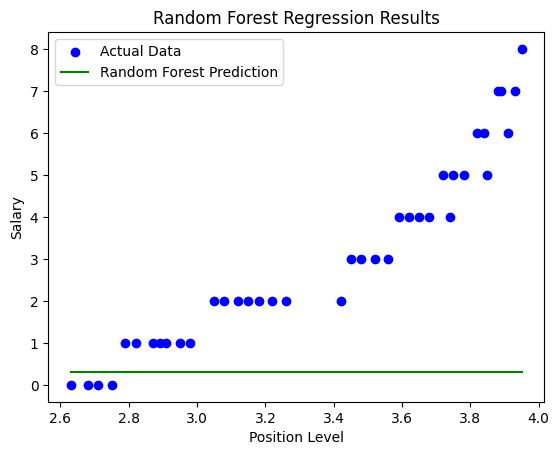

In [ ]:
import numpy as np


X = df.iloc[:, 1:2].values


X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)
X_grid = X_grid.reshape(-1, 1)

num_features = x.shape[1]
X_grid = np.hstack((X_grid, np.zeros((X_grid.shape[0], num_features - 1))))


plt.scatter(X[:, 0], y, color='blue', label="Actual Data")  # Plot first feature vs target
plt.plot(X_grid[:, 0], regressor.predict(X_grid), color='green', label="Random Forest Prediction")
plt.title("Random Forest Regression Results")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()